<a href="https://colab.research.google.com/github/jakelaporte/MathematicalModeling/blob/master/Lsn05_MVOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lesson 5 Multivariable Optimization (pages 21-31)
Example 2.1 Color TV Sales

**Facts/Variables:**<ol>
- $s$ = number of 19-inch TVs sold (per year)<br>
- $t$ = number of 21-inch TVs sold (per year)<br>
- $p$ = selling price of a 19 in set (\$)<br>
- $q$ = selling price of a 21 in set (\$)<br>
- $C$ = cost of manufacturing sets (\$/yr)<br>
- $R$ = revenue from sale of sets (\$/yr)<br>
- $P$ = profit from the sale of sets (\$/yr)<br>
</ol>

**Assumptions** <ol>
- $p$ - selling price of 19in set is affected by the number of 19in & 21in TV sets sold: $p=339-0.01s-0.003t$
- $q$ - selling price of 21in set is affected by the number of 19in & 21in TV sets sold: $q=339-0.004s-0.01t$
- $R$ - revenue is made only from selling these two TV sets: $R = ps+qt$
- $C$ - there is a fixed cost and enough of other materials not to cause any additional cost for making more sets: $C = 400000+195s+225t$
- $P = R-C$
- $s\ge0$
- $t\ge0$
</ol>

**Objective:** Maximixe $P$

#### Numerical Calculation using a form of Newton's Method ####
Let's start by recalling single variable newton's method and using that to understand multi-variable version.<br>
The general form of a numerical method lies in using the previous value and adding some step that makes the next value better: $x_{n+1} = x_n+p$ the step in this equation is the step $p$. Newton's method (as we derived in class) uses the derivatives to find the best step.<br><br>
$x_{n+1} = x_n-\frac{f(x_n)}{f'(x_n)}$ solves for the root of $f(x)$ <br><br>
When trying to find an optimal point, we substitute the derivative in for the function to find the root of the derivative.<br> <br>
$x_{n+1} = x_n-\frac{f'(x_n)}{f''(x_n)}$ solves for the root of $f'(x)$. <br><br>
This numerical method allows us to take steps toward optimal point. Here, let's take $x_n$ to the left side and isolate the step so that we can use this same process for multivariable. $x_{n+1}-x{n} = p = -\frac{f'(x_n)}{f''(x_n)}$ which turns into $\boxed{f''(x_n)p=-f'(x_n)}$. This is the same formula that we will use for the multivariable newton's method to find the direction of the next step.

#### Multivariable Newton's Method ####
Starting the same as above except with vectors this time, we see that $\vec{x}_{n+1}=\vec{x}_n+\vec{p}$. All we need to do is find the direction $\vec{p}$. Using the boxed equation and Linear Algebra instead of simple algebra, we need to solve the following equation at each step of process:<br><br>
$$ \vec{\triangledown}^2 f(x_n)\vec{p} =  -\vec{\triangledown} f(x_n)$$ <br>
where $\vec{\triangledown}^2 f(x_n)$ is the Hessian Matrix and $\vec{\triangledown} f(x_n)$ is the gradient.<br><br>
If we perform this method for large problems, then it would cost a lot of calculations to find the Hessian matrix at each step. This computationally expensive requirement is usually relaxed in the non-linear optimization by finding and updating an approximation to the Hessian at each step. The method used by many was developed by Broyden, Fletcher, Goldfarb, and Shanno and is known by their initials (BFGS). The idea behind their method is to use the difference between the gradients and previous locations to create a rank 2 update to the previous Hessian that preserves both symmetry and positive definiteness of the Hessian matrix. We will not use our own code to find the optimal point, so it is not helpful to review their method. This is a topic for our non-linear optimization course, but it is not difficult and you are only asked to understand that it is simply updating the Hessian matrix using the gradient at each step. This relaxation of calculating the Hessian makes this method known as a Quasi-Newton method.

#### Use the Quasi-Newton BFGS method ####
The last idea that you need to understand before using the method in practice is that it is for a minimization. As described in lesson 1, positive definiteness relates back to finding minimums. So, what do we do we are maximizing a function? Do we take all of these ideas and reverse them or is there another way?? We can turn any maximization into a minimization by simply multiplying the objective function by a -1 which is much easier than having two different systems for min and max. So that is what we will do in practice. The Transform step above got us to maximizing a profit - we will minimize the negative of this function (see below).

In [0]:
P = function(x){
    return(((339-0.01*x[1]-0.003*x[2])*x[1]
           +(399-0.004*x[1]-0.01*x[2])*x[2]
           -(400000+195*x[1]+225*x[2]))*-1)
}
x=c(500,500) #starting point for optimization
ans = optim(x,P,method="BFGS") #BFGS is a numerical technique used to incrementally calculate the Hessian for Newton
print(ans)
paste(c("Profits are maximized by selling:",round(ans$par[1])," 19 in TVs and ",
        round(ans$par[2])," 21 in TVs. Resulting in a profit of: $",
        format(round(-P(ans$par)),big.mark=",")),collapse="")
paste(c("Average Selling Price of 19 in set is: $",round(339-0.01*ans$par[1]-0.003*ans$par[2],2)),collapse="")
paste(c("Average Selling Price of 21 in set is: $",round(399-0.004*ans$par[1]-0.01*ans$par[2],2)),collapse="")

$par
[1] 4735.043 7042.735

$value
[1] -553641

$counts
function gradient 
       8        5 

$convergence
[1] 0

$message
NULL



[1] "Profits are maximized by selling:4735 19 in TVs and 7043 21 in TVs. Resulting in a profit of: $553,641"

[1] "Average Selling Price of 19 in set is: $270.52"

[1] "Average Selling Price of 21 in set is: $309.63"

## Sensitivity Analysis
Choose an assumption and let's analyze how changing that assumption will affect our result. The book chooses price elasticity of 19 inch sets. Let's do the same thing in R to see how we can use R to analyze this assumption and see what happens to the answer as we change this assumption. Let's start by changing our function from above into one that only considers the value of a and calculates the new optimal, since we might need the optimal value or the parameters, let's print out and later return both in a list. Since we know the values (from above) for 0.01, use it as validating our function.

In [0]:
P = function(a){
    f = function(x){((339-a*x[1]-0.003*x[2])*x[1]
           +(399-0.004*x[1]-0.01*x[2])*x[2]
           -(400000+195*x[1]+225*x[2]))*-1
    }
    x = c(4700,7042)
    ans = optim(x,f,method="BFGS")
    ## Choose which of these that we will return ##
    print(ans$par)
    print(ans$value)   
}
P(0.01)

[1] 4735.051 7042.736
[1] -553641


#### Figure 2.5 from the book 
Let's use the function above and a sequence of a values (looks like the book goes from 0 through 0.02. Since the optimum production value for 19 inch sets is plotted, then that is what we will choose to return in our function (and we will take out the print statements).

       a        x1          x2      profit
1  0.002 53612.900 -10064.5124 2,584,516.1
2  0.003 23407.877    505.7253 1,329,521.1
3  0.004 14972.535   3458.7579   979,027.0
4  0.005 11006.446   4847.4863   814,225.2
5  0.006  8710.635   5647.0907   718,449.7
6  0.007  7197.875   6178.8347   655,844.1
7  0.008  6136.679   6553.7258   611,719.4
8  0.009  5345.303   6829.6616   578,945.3
9  0.010  4735.051   7042.7364   553,641.0
10 0.011  4250.122   7212.2779   533,514.1
11 0.012  3855.381   7350.3407   517,123.0
12 0.013  3527.805   7464.9580   503,515.9
13 0.014  3251.579   7561.6335   492,039.1
14 0.015  3015.498   7644.2737   482,228.7
15 0.016  2811.397   7715.7278   473,746.2
16 0.017  2633.185   7778.1230   466,339.1
17 0.018  2476.229   7833.0791   459,815.2
18 0.019  2336.937   7881.8518   454,025.3
19 0.020  2212.485   7925.4288   448,852.2


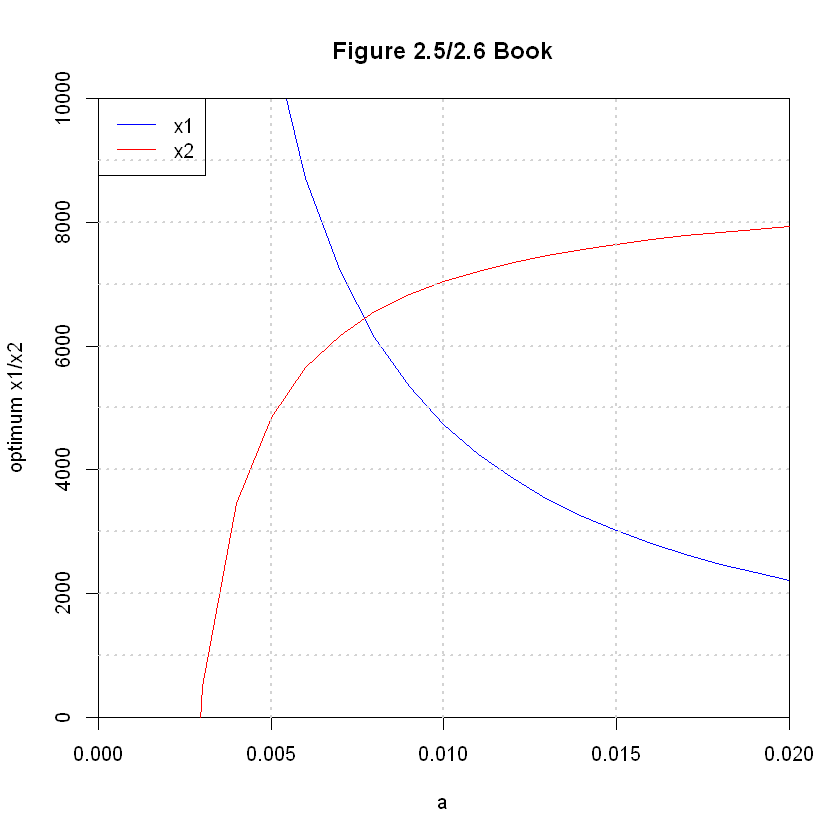

In [0]:
P = function(a){
    f = function(x){((339-a*x[1]-0.003*x[2])*x[1]
           +(399-0.004*x[1]-0.01*x[2])*x[2]
           -(400000+195*x[1]+225*x[2]))*-1
    }
    x = c(4700,7042)
    ans = optim(x,f,method="BFGS")
    ## Choose which of these that we will return ##
    #print(ans$par)
    #print(ans$value)   
    return(ans)
}
a = seq(0.002,0.02,0.001)
ans.x1=0
ans.x2=0
ans.profit=0
for(i in 1:length(a)){
    ans = P(a[i])
    ans.x1[i]=ans$par[1]
    ans.x2[i]=ans$par[2]
    ans.profit[i] = -ans$value
}
result = data.frame(a=a,x1=ans.x1,x2=ans.x2,profit=format(ans.profit,big.mark=","))
print(result)
plot(a,ans.x1,xlim=c(0,0.02),ylim=c(0,10000),type="l",ylab="optimum x1/x2",main="Figure 2.5/2.6 Book",
     xaxs="i", yaxs="i",col="blue")
lines(a,ans.x2,col="red")
legend("topleft",legend=c("x1","x2"),lty=1,col=c("blue","red"))
grid(lwd=2, nx=4, ny=10)

The book uses the derivative to estimate what would happen, our results are what actually happens when you change the result by 10%. Understanding what the book is doing and how it is using the derivative to get the estimate is fine and will definitely help you understand what we actually need to do with the computing power that we have in R.

Each one of the function calls below is an optimization of the parameters with a different value for elasticity. We built a table with all of the values that you need above, but below is how you would use those values in the table.

In [0]:
## If we are only interested in what happens at a 10% increase in elasticity
(P(0.011)$par[1]-P(0.01)$par[1])/P(0.01)$par[1]
(P(0.011)$par[2]-P(0.01)$par[2])/P(0.01)$par[2]
paste(c("Here are the numbers from the table that were used in the first calculation:",
        P(0.011)$par[1],P(0.01)$par[1]),collapse=" ")

[1] -0.1024127

[1] 0.02407324

[1] "Here are the numbers from the table that were used in the first calculation: 4250.12157764057 4735.05111506547"

 [1] 979027.0 814225.2 718449.7 655844.1 611719.4 578945.3 553641.0 533514.1
 [9] 517123.0 503515.9 492039.1 482228.7 473746.2 466339.1 459815.2 454025.3
[17] 448852.2


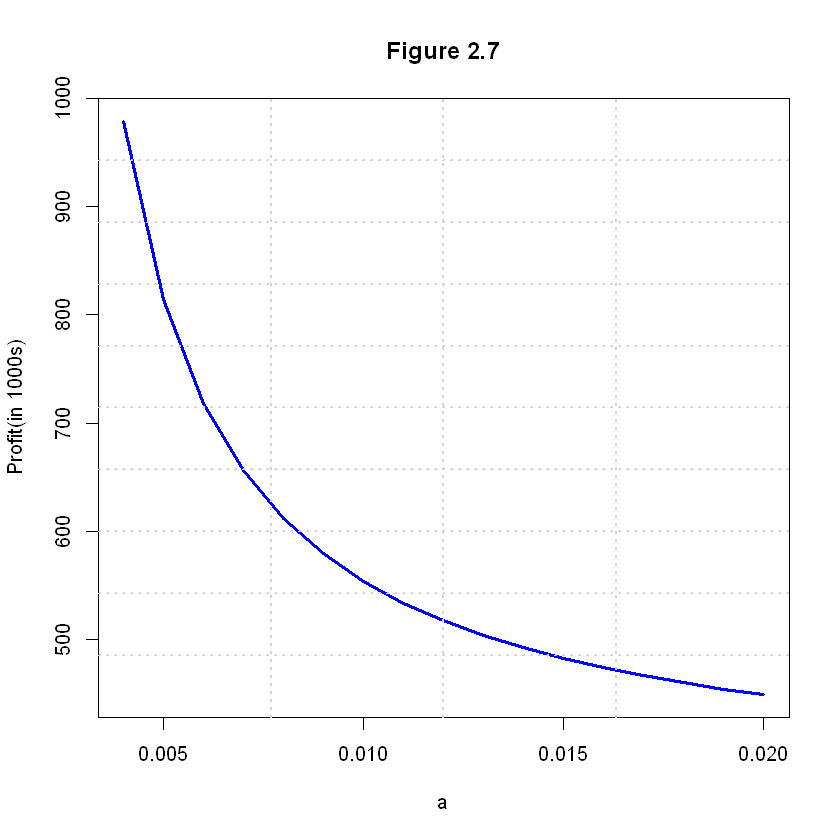

In [0]:
## Use the data frame to produce Figure 2.7 ##
## Note the very strange way of slicing the data ##
print(ans.profit[3:length(ans.profit)])
plot(result$a[3:length(result$a)],ans.profit[3:length(ans.profit)]/1000,xlab="a",ylab="Profit(in 1000s)",
     type="l",col="blue",lwd=3,main="Figure 2.7")
grid(lwd=2, nx=4, ny=10)

From page 29, the author is interested in a 10% increase in price elasticity and the effects on the profit level. Our calculations are that a 10% increase in price level will result in a 3.6% decrease in profits (see next R calc). You can also use the table above to get the same calculations.

In [0]:
(P(0.011)$value-P(0.01)$value)/P(0.01)$value

## Table values ##
a[10]
ans.profit[10]
a[9]
ans.profit[9]

[1] -0.03635381

[1] 0.011

[1] 533514.1

[1] 0.01

[1] 553641

## Sensitivity - what do we really lose if a = 0.011 instead of a=0.01
In the book on page 30-31, the author tries to convince you that the answer is quite robust. Let's actually do the calculations to confirm or deny that. Assume that we solve the model using a = 0.01, and let a actually fluctuate (he used 10%, but we can test a lot using R.<br>
#### Recall the solution, x1=4735 and x2=7042 ####
Now let's see what happens to our profit as a goes from 0.01 through 0.02 by 0.001. We will compare the profit made by producing (4735,7042) with the optimal solution for each scenario (a).

In [0]:
P1 = function(a){
    f = function(x){((339-a*x[1]-0.003*x[2])*x[1]
           +(399-0.004*x[1]-0.01*x[2])*x[2]
           -(400000+195*x[1]+225*x[2]))*-1
    }
    x = c(4735,7042) 
    return(f(x))
}
a = seq(0.01,0.02,0.0005)
ans.profit = 0
ans.maxProfit=0
for (i in 1:length(a)){
    ans.profit[i]=-P1(a[i])
    ans.maxProfit[i] = -P(a[i])$value
}
result = data.frame(a=a,change=(a-0.01)/0.01,profit=ans.profit,max_profit=ans.maxProfit,
                    diff=round((ans.maxProfit-ans.profit)/ans.maxProfit,4))
print(result)

        a change   profit max_profit   diff
1  0.0100   0.00 553641.0   553641.0 0.0000
2  0.0105   0.05 542430.9   543035.0 0.0011
3  0.0110   0.10 531220.8   533514.1 0.0043
4  0.0115   0.15 520010.7   524919.7 0.0094
5  0.0120   0.20 508800.6   517123.0 0.0161
6  0.0125   0.25 497590.5   510017.7 0.0244
7  0.0130   0.30 486380.3   503515.9 0.0340
8  0.0135   0.35 475170.2   497543.8 0.0450
9  0.0140   0.40 463960.1   492039.1 0.0571
10 0.0145   0.45 452750.0   486949.1 0.0702
11 0.0150   0.50 441539.9   482228.7 0.0844
12 0.0155   0.55 430329.8   477838.9 0.0994
13 0.0160   0.60 419119.7   473746.2 0.1153
14 0.0165   0.65 407909.6   469921.4 0.1320
15 0.0170   0.70 396699.4   466339.1 0.1493
16 0.0175   0.75 385489.3   462976.9 0.1674
17 0.0180   0.80 374279.2   459815.2 0.1860
18 0.0185   0.85 363069.1   456836.5 0.2053
19 0.0190   0.90 351859.0   454025.3 0.2250
20 0.0195   0.95 340648.9   451368.0 0.2453
21 0.0200   1.00 329438.8   448852.2 0.2660
